
Simulate a “multiple” regression with two predictors problem by yourself, with sufficient sample size, e.g., 50000 samples.
𝑦 = 𝛽0 + 𝛽1𝑥1 + 𝛽2𝑥2 + 𝜖, 𝜖~𝑁(0, 𝜎2).

a. (5%) Use the regression package in your preferable environment (R or Python) to analyze the problem
and review the results.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing Necessary Libraries
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/homework_2/

/content/drive/MyDrive/Colab Notebooks/homework_2


In [ ]:
# Importing data and separating X & y variables

np.random.seed(42)
x1 = np.array(sorted(list(range(5))*10000)) + np.random.normal(size=50000, scale=0.5)
x2 = np.array(sorted(list(range(5))*10000)) + np.random.normal(size=50000, scale=0.5)

y = np.array(sorted(list(range(5))*10000)) + np.random.normal(size=50000, scale=0.25)


x1 = np.expand_dims(x1, axis=1)
x2 = np.expand_dims(x2, axis=1)
X = np.hstack((x1,x2))





(50000, 1)


(50000, 2)

In [ ]:
from sklearn import linear_model  # Importing linear model
lm = linear_model.LinearRegression()   # Linear regression
lm.fit(X, y)           # Fitting the data

LinearRegression()

In [ ]:
# Printing the thetas (intercept and coefs)
print(lm.intercept_, lm.coef_)
# print(lm.coef_)

#Predictions
X_predict_1=np.array([[1,1]])
X_predict_2=np.array([[2,0]])
X_predict_3=np.array([[3,2]])
print("Prediction for (1,1) = " + str(lm.predict(X_predict_1)))
print("Prediction for (2,0) = " + str(lm.predict(X_predict_2)))
print("Prediction for (3,2) = " + str(lm.predict(X_predict_3)))

0.11685584985460573 [0.47126609 0.47052485]
Prediction for (1,1) = [1.05864679]
Prediction for (2,0) = [1.05938804]
Prediction for (3,2) = [2.47170383]


b. (15%) From the perspective of “machine learning,” code the gradient descent method to optimize
(minimize) the error function and get the coefficients. Do you get the same results as those in (a)? Demonstrate the evolution of the iterative errors and the searching path in the domain of the error function.


In [ ]:
# Multivariate Linear Regression using Gradient Descent
def LinReg_with_gradient_descent(X, y, alpha, epoch):
  m = X.shape[0]  # number of samples
  ones =np.ones((m,1))  
  X = np.concatenate((ones, X), axis=1)   # Nuw X with X0's =1
  n = X.shape[1]   # 
  Theta = np.ones(n)    # n= 4  parameter initialization
  h = np.dot(X, Theta)   # Compute hypothesis

  # Gradient descent algorithm
  cost = np.ones(epoch)
  for i in range (0, epoch):
    Theta[0] = Theta[0] - (alpha / X.shape[0]) * sum(h-y)
    for j in range(1, n):
      Theta[j]= Theta[j] - (alpha/ X.shape[0]) * sum((h-y) * X[:, j])
    h  = np.dot(X, Theta)
    cost[i] = 1/(2*m) * sum(np.square(h-y))  # Compute Cost
  return cost, Theta


In [ ]:
# Calculating theta and cost
cost, theta = LinReg_with_gradient_descent(X, y, 0.1, 1000)
print(theta)

[0.11685585 0.47126609 0.47052485]


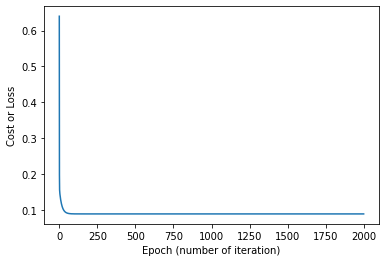

Lowest cost =0.08925560442625179
 Cost after 2000 iterations = 0.08925560442625435


In [ ]:
# Checking out the loss or cost plot
plt.plot(cost)
plt.xlabel("Epoch (number of iteration)")
plt.ylabel( "Cost or Loss")
plt.show()
print("Lowest cost =" + str(np.min(cost)))
print(" Cost after 1000 iterations = " + str(cost[-1]))

In [ ]:
X_predict_1= np.array([1, 2,0])
y_predict_1= np.dot(X_predict_1, theta)
print(y_predict_1)

1.059388038483641


In [ ]:
#Predictions for the new values using the model
X_predict_1=np.array([1,1])
X_predict_2=np.array([2,0])
X_predict_3=np.array([3,2])

#Predictions
X_predict_1 = np.concatenate(([1], X_predict_1), axis = 0) # Adding one colum of one in the beggining
y_predict_1=np.dot(theta, X_predict_1)
print("Prediction for (1,1) = " + str(y_predict_1))

X_predict_2 = np.concatenate(([1], X_predict_2), axis = 0) # Adding one colum of one in the beggining
y_predict_2=np.dot(theta, X_predict_2)
print("Prediction for (2,0) = " + str(y_predict_2))

X_predict_3 = np.concatenate(([1], X_predict_3), axis = 0) # Adding one colum of one in the beggining
y_predict_3=np.dot(theta, X_predict_3)
print("Prediction for (3,2) = " + str(y_predict_3))

Prediction for (1,1) = 1.0586467907857617
Prediction for (2,0) = 1.059388038483641
Prediction for (3,2) = 2.471703826031426
